## Importing Libraries 


In [1]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
import sys
import time
import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)
import pickle
import math
from datetime import datetime
from dateutil.relativedelta import relativedelta

import torch.nn as nn
import math

CUDA_LAUNCH_BLOCKING = "1"

## Preparing the Dataset


 Converting the dataset to a machine feedable dataset

In [2]:
df = pd.read_csv('demo.csv')
df.head()

,Unnamed: 0,Period,espresso Lungo Sales,cappuccino classic Sales,Caramel flavor syrup Sales,Latte Classic Sales,cappuccino Grande Sales,Espresso with cream Sales,espresso classic Sales,Hazelnut flavor syrup Sales
0,0,03/01/2012,22.0,26.0,4.0,8.0,7.0,9.0,2.0,6.0
1,1,04/01/2012,15.0,38.0,4.0,6.0,7.0,9.0,5.0,8.0
2,2,05/01/2012,27.0,34.0,0.0,7.0,6.0,6.0,6.0,8.0
3,3,06/01/2012,25.0,28.0,0.0,8.0,8.0,8.0,3.0,0.0
4,4,07/01/2012,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(704, 10)

In [4]:
i = 4
while i<df.shape[0]:
    df = df.drop(df.index[i])
    i = i + 6
print(df.shape)

(604, 10)


In [5]:
df.head(50)

,Unnamed: 0,Period,espresso Lungo Sales,cappuccino classic Sales,Caramel flavor syrup Sales,Latte Classic Sales,cappuccino Grande Sales,Espresso with cream Sales,espresso classic Sales,Hazelnut flavor syrup Sales
0,0,03/01/2012,22.0,26.0,4.0,8.0,7.0,9.0,2.0,6.0
1,1,04/01/2012,15.0,38.0,4.0,6.0,7.0,9.0,5.0,8.0
2,2,05/01/2012,27.0,34.0,0.0,7.0,6.0,6.0,6.0,8.0
3,3,06/01/2012,25.0,28.0,0.0,8.0,8.0,8.0,3.0,0.0
5,5,08/01/2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,09/01/2012,28.0,35.0,8.0,14.0,7.0,8.0,6.0,0.0
7,7,10/01/2012,40.0,28.0,4.0,11.0,9.0,10.0,4.0,6.0
8,8,11/01/2012,25.0,32.0,4.0,14.0,5.0,3.0,7.0,8.0
9,9,12/01/2012,26.0,48.0,26.0,7.0,7.0,10.0,13.0,0.0
10,10,13/01/2012,27.0,37.0,8.0,10.0,5.0,6.0,6.0,6.0


In [6]:
df.shape

(604, 10)

In [7]:
df = df.loc[~((df['espresso Lungo Sales'] == 0))]
df.shape

(486, 10)

In [8]:
df.head(50)

,Unnamed: 0,Period,espresso Lungo Sales,cappuccino classic Sales,Caramel flavor syrup Sales,Latte Classic Sales,cappuccino Grande Sales,Espresso with cream Sales,espresso classic Sales,Hazelnut flavor syrup Sales
0,0,03/01/2012,22.0,26.0,4.0,8.0,7.0,9.0,2.0,6.0
1,1,04/01/2012,15.0,38.0,4.0,6.0,7.0,9.0,5.0,8.0
2,2,05/01/2012,27.0,34.0,0.0,7.0,6.0,6.0,6.0,8.0
3,3,06/01/2012,25.0,28.0,0.0,8.0,8.0,8.0,3.0,0.0
6,6,09/01/2012,28.0,35.0,8.0,14.0,7.0,8.0,6.0,0.0
7,7,10/01/2012,40.0,28.0,4.0,11.0,9.0,10.0,4.0,6.0
8,8,11/01/2012,25.0,32.0,4.0,14.0,5.0,3.0,7.0,8.0
9,9,12/01/2012,26.0,48.0,26.0,7.0,7.0,10.0,13.0,0.0
10,10,13/01/2012,27.0,37.0,8.0,10.0,5.0,6.0,6.0,6.0
13,13,16/01/2012,18.0,29.0,16.0,7.0,6.0,7.0,9.0,0.0


In [9]:
df.set_index('Period', inplace=True)
df = df[['Hazelnut flavor syrup Sales']]
df.columns = [ 'Expected' ]
df.head(50)

# df.to_csv('demo2.csv')

,Expected
Period,
03/01/2012,6.0
04/01/2012,8.0
05/01/2012,8.0
06/01/2012,0.0
09/01/2012,0.0
10/01/2012,6.0
11/01/2012,8.0
12/01/2012,0.0
13/01/2012,6.0


In [10]:
sugardaddy = list(df.index[292:])

In [11]:
num_zeros = 0
for i in range(df.shape[0]):
    if df.iloc[i]['Expected'] == 0:
        num_zeros += 1
print(num_zeros)

90


In [12]:
df['Expected'].replace(to_replace = 0, value = int(df['Expected'].mean()), inplace=True)

In [13]:
df = df.loc[~(df==0).all(axis=1)]
df.head(30)

,Expected
Period,
03/01/2012,6.0
04/01/2012,8.0
05/01/2012,8.0
06/01/2012,10.0
09/01/2012,10.0
10/01/2012,6.0
11/01/2012,8.0
12/01/2012,10.0
13/01/2012,6.0


In [14]:
df.shape

(486, 1)

In [15]:
df['Expected'] = df['Expected'].astype('float32')
df.dropna(inplace=True)
df.shape

(480, 1)

In [16]:
data = df.values.astype('float32')

In [17]:
data.shape

(480, 1)

#### Split the dataset into sequences, these sequences will be the input for the model and the output will be the number after the sequence.

In [18]:
def split_dataset_into_seq(dataset, start_index=0, end_index=None, history_size=13, step=1):
    data = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset)
    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
    return np.array(data)

### Train-Val-Test Split 

In [19]:
def split_dataset(data, TRAIN_SPLIT=0.9, VAL_SPLIT=0.6):
    # normalization
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    data = (data - data_mean) / data_std
    stats = (data_mean, data_std)

    data_in_seq = split_dataset_into_seq(data, start_index=0, end_index=None, history_size=13, step=1)

    # split between validation dataset and test set:
    train_data, val_data = train_test_split(data_in_seq, train_size=TRAIN_SPLIT, shuffle=True, random_state=123)
    val_data, test_data = train_test_split(val_data, train_size=VAL_SPLIT, shuffle=True, random_state=123)

    return train_data, val_data, test_data

In [20]:
def split_fn(spiltttt):
    inputs = torch.tensor(spiltttt[:, :-1, :], device=device)
    targets = torch.tensor(spiltttt[:, 1:, :], device=device)
    return inputs, targets

In [21]:
def data_to_dataset(train_data, val_data, test_data, batch_size=32, target_features=list(range(1))):
    x_train, y_train = split_fn(train_data)
    x_val, y_val = split_fn(val_data)
    x_test, y_test = split_fn(test_data)

    train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
    val_dataset = torch.utils.data.TensorDataset(x_val, y_val)
    test_dataset = torch.utils.data.TensorDataset(x_test, y_test)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)
    return train_loader, val_loader, test_loader

### Setting up gpu as a primary device 

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [23]:
train_data, val_data, test_data = split_dataset(data, 0.9, 0.4)
train_data.shape

(420, 13, 1)

In [24]:
train_data.shape

(420, 13, 1)

#### Normaliztion of dataset

In [25]:
data_mean = data.mean(axis=0)
data_std = data.std(axis=0)
data = (data - data_mean) / data_std
inputs, targets = split_fn(split_dataset_into_seq(data))
print(inputs.shape, targets.shape)
test_dataset = torch.utils.data.TensorDataset(inputs, targets)
test_dataset = torch.utils.data.DataLoader(test_dataset, batch_size=32)


torch.Size([467, 12, 1]) torch.Size([467, 12, 1])


In [26]:
blah_blah_Blah = test_dataset

In [27]:
train_dataset, val_dataset, test_dataset = data_to_dataset(train_data, val_data, test_data)

### Implementation of the Transformer model

In [28]:


class MultiHeadAttention(nn.Module):

    def __init__(self, D, H):
        super(MultiHeadAttention, self).__init__()
        self.H = H # number of heads
        self.D = D # dimension
        self.wq = nn.Linear(D, D*H)
        self.wk = nn.Linear(D, D*H)
        self.wv = nn.Linear(D, D*H)
        self.dense = nn.Linear(D*H, D)

    def concat_heads(self, x):
        
        B, H, S, D = x.shape
        x = x.permute((0, 2, 1, 3)).contiguous()  # (B, S, H, D)
        x = x.reshape((B, S, H*D))   # (B, S, D*H)
        return x

    def split_heads(self, x):
        
        B, S, D_H = x.shape
        x = x.reshape(B, S, self.H, self.D)    # (B, S, H, D)
        x = x.permute((0, 2, 1, 3))  # (B, H, S, D)
        return x

    def forward(self, x, mask):

        q = self.wq(x)  # (B, S, D*H)
        k = self.wk(x)  # (B, S, D*H)
        v = self.wv(x)  # (B, S, D*H)

        q = self.split_heads(q)  # (B, H, S, D)
        k = self.split_heads(k)  # (B, H, S, D)
        v = self.split_heads(v)  # (B, H, S, D)

        attention_scores = torch.matmul(q, k.transpose(-1, -2)) #(B,H,S,S)
        attention_scores = attention_scores / math.sqrt(self.D)

        if mask is not None:
            attention_scores += (mask * -1e9)
            
        attention_weights = nn.Softmax(dim=-1)(attention_scores)
        scaled_attention = torch.matmul(attention_weights, v)  # (B, H, S, D)
        concat_attention = self.concat_heads(scaled_attention) # (B, S, D*H)
        output = self.dense(concat_attention)  # (B, S, D)

        return output, attention_weights

In [29]:
B, S, H, D = 9, 11, 5, 8
mha = MultiHeadAttention(D, H)
out, att = mha.forward(torch.zeros(B, S, D), mask=None)
out.shape, att.shape

(torch.Size([9, 11, 8]), torch.Size([9, 5, 11, 11]))

### Positional encodings
We use combination of sines and cosine equations for creating position encoding of the input data. Since for a time series analysis it is important to maintain the information positon of the input data values so here we use positional encodings

In [30]:
def get_angles(pos, i, D):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(D))
    return pos * angle_rates

def positional_encoding(D, position=20, dim=3, device=device):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(D)[np.newaxis, :],
                            D)
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    if dim == 3:
        pos_encoding = angle_rads[np.newaxis, ...]
    elif dim == 4:
        pos_encoding = angle_rads[np.newaxis,np.newaxis,  ...]
    return torch.tensor(pos_encoding, device=device)

In [31]:
# function that implement the look_ahead mask for masking future time steps. 
def create_look_ahead_mask(size, device=device):
    mask = torch.ones((size, size), device=device)
    mask = torch.triu(mask, diagonal=1)
    return mask  # (size, size)

In [32]:
create_look_ahead_mask(6)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]], device='cuda:0')

## Creating the Transformer Architecture

In [33]:
class TransformerLayer(nn.Module):
    def __init__(self, D, H, hidden_mlp_dim, dropout_rate):
        super(TransformerLayer, self).__init__()
        self.dropout_rate = dropout_rate
        self.mlp_hidden = nn.Linear(D, hidden_mlp_dim)
        self.mlp_out = nn.Linear(hidden_mlp_dim, D)
        self.layernorm1 = nn.LayerNorm(D, eps=1e-9)
        self.layernorm2 = nn.LayerNorm(D, eps=1e-9)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

        self.mha = MultiHeadAttention(D, H)


    def forward(self, x, look_ahead_mask):
        
        attn, attn_weights = self.mha(x, look_ahead_mask)  # (B, S, D)
        attn = self.dropout1(attn) # (B,S,D)
        attn = self.layernorm1(attn + x) # (B,S,D)

        mlp_act = torch.relu(self.mlp_hidden(attn))
        mlp_act = self.mlp_out(mlp_act)
        mlp_act = self.dropout2(mlp_act)
        
        output = self.layernorm2(mlp_act + attn)  # (B, S, D)

        return output, attn_weights

In [34]:
dl = TransformerLayer(16, 3, 32, 0.1)
out, attn = dl(x=torch.zeros(5, 7, 16), look_ahead_mask=None)
out.shape, attn.shape

(torch.Size([5, 7, 16]), torch.Size([5, 3, 7, 7]))

In [35]:
class Transformer(nn.Module):

    def __init__(self, num_layers, D, H, hidden_mlp_dim, inp_features, out_features, dropout_rate):
        super(Transformer, self).__init__()
        self.sqrt_D = torch.tensor(math.sqrt(D))
        self.num_layers = num_layers
        self.input_projection = nn.Linear(inp_features, D) # multivariate input
        self.output_projection = nn.Linear(D, out_features) # multivariate output
        self.pos_encoding = positional_encoding(D)
        self.dec_layers = nn.ModuleList([TransformerLayer(D, H, hidden_mlp_dim, 
                                        dropout_rate=dropout_rate
                                       ) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, mask):
        B, S, D = x.shape
        attention_weights = {}
        x = self.input_projection(x)
        x *= self.sqrt_D
        
        x += self.pos_encoding[:, :S, :]

        x = self.dropout(x)

        for i in range(self.num_layers):
            x, block = self.dec_layers[i](x=x,
                                          look_ahead_mask=mask)
            attention_weights['decoder_layer{}'.format(i + 1)] = block
        
        x = self.output_projection(x)
        
        return x, attention_weights # (B,S,S)

In [36]:
# Test Forward pass on the Transformer: 
transformer = Transformer(num_layers=3, D=32, H=1, hidden_mlp_dim=32,
                                       inp_features=1, out_features=1, dropout_rate=0.1)
transformer.to(device)
(inputs, targets) = next(iter(train_dataset))
                         
S = inputs.shape[1]
mask = create_look_ahead_mask(S)
out, attn = transformer (x=inputs.float(), mask=mask)
out.shape, attn["decoder_layer1"].shape

(torch.Size([32, 12, 1]), torch.Size([32, 1, 12, 12]))

## Training the Transformer

In [37]:
# param_sizes = [p.numel() for p in transformer.parameters()]
# print(f"for a total of {np.sum(param_sizes)} parameters ")

In [38]:
transformer = Transformer(num_layers=3, D=32, H=4, hidden_mlp_dim=32, inp_features=1, out_features=1, dropout_rate=0.1).to(device)
# optimizer = torch.optim.RMSprop(transformer.parameters(),lr=0.00005)

In [39]:
# n_epochs = 500
# niter = len(train_dataset)
# losses, val_losses = [], []

# for e in tqdm(range(n_epochs)):
    
#     # one epoch on train set
#     transformer.train()
#     sum_train_loss = 0.0
#     for x,y in train_dataset:
#         S = x.shape[1]
#         mask = create_look_ahead_mask(S)
#         out, _ = transformer(x.float(), mask)
#         loss = torch.nn.MSELoss()(out, y)
#         sum_train_loss += loss.item()
#         loss.backward()
#         optimizer.step()
#     losses.append(sum_train_loss / niter)
    
#     # Evaluate on val set
#     transformer.eval()
#     sum_val_loss = 0.0
#     for i, (x, y) in enumerate(val_dataset):
#         S = x.shape[1]
#         mask = create_look_ahead_mask(S)
#         out, _ = transformer(x, mask)
#         loss = torch.nn.MSELoss()(out, y)
#         sum_val_loss += loss.item()
#     val_losses.append(sum_val_loss / (i + 1))

In [40]:
filename = 'finalized_model.sav'
# pickle.dump(transformer, open(filename, 'wb'))

In [41]:
# plt.plot(losses)
# plt.plot(val_losses)

### Evaluation on Test set

In [42]:
loaded_model = pickle.load(open(filename, 'rb'))

In [43]:
type(test_dataset)

torch.utils.data.dataloader.DataLoader

In [44]:
test_dataset = blah_blah_Blah 

In [45]:
print(test_dataset.batch_size)

32


In [46]:
data = df.values.astype('float32')

In [47]:
test_losses, test_preds  = [], []
loaded_model.eval()
for (x, y) in test_dataset:
    
    S = x.shape[-2]
    
    y_pred, _ = loaded_model(x, mask=create_look_ahead_mask(S))
    y = y.cpu().detach().numpy()*data.std(axis=0)+data.mean(axis=0)
    y_pred = y_pred.cpu().detach().numpy()*data.std(axis=0)+data.mean(axis=0)
    
    y = torch.tensor(y)
    y_pred = torch.tensor(y_pred)
    
    loss_test = torch.nn.MSELoss()(torch.tensor(y_pred),torch.tensor(y))  # (B,S)
    test_losses.append(loss_test.item())
    test_preds.append(y_pred.detach().cpu().numpy())
test_preds = np.vstack(test_preds)
np.mean(test_losses)
squared_loss = np.mean(test_losses)

In [48]:
print(test_preds.shape)

(467, 12, 1)


In [49]:
x_test, _ = test_dataset.dataset.tensors
x_test = x_test.cpu().detach().numpy()*data.std(axis=0)+data.mean(axis=0)

In [50]:
print(x_test.shape)

(467, 12, 1)


In [51]:
df.head(30)

,Expected
Period,
03/01/2012,6.0
04/01/2012,8.0
05/01/2012,8.0
06/01/2012,10.0
09/01/2012,10.0
10/01/2012,6.0
11/01/2012,8.0
12/01/2012,10.0
13/01/2012,6.0


In [52]:
x_test_array = []
import math
for i in range(11):
    x_test_array.append(math.ceil(x_test[i, 0, 0]))
for i in range(x_test.shape[0]):
    x_test_array.append(math.ceil(x_test[i,11]))

In [53]:
test_preds_array = []
import math
for i in range(11):
    test_preds_array.append(math.ceil(test_preds[i, 0, 0]))
for i in range(x_test.shape[0]):
    test_preds_array.append(math.ceil(test_preds[i,11]))

In [54]:
len(test_preds_array)
print(test_preds_array)

[9, 9, 9, 10, 10, 9, 9, 10, 9, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 9, 11, 11, 11, 11, 12, 10, 10, 10, 10, 10, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 9, 9, 9, 9, 9, 9, 9, 12, 12, 13, 10, 9, 9, 10, 9, 9, 10, 9, 8, 10, 10, 11, 10, 10, 11, 10, 10, 10, 10, 10, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 10, 10, 10, 11, 12, 10, 12, 13, 12, 13, 12, 12, 13, 13, 13, 11, 12, 12, 10, 10, 10, 11, 12, 10, 12, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 12, 13, 13, 13, 26, 25, 22, 12, 11, 14, 21, 23, 22, 21, 22, 22, 25, 22, 12, 12, 12, 10, 9, 9, 8, 8, 10, 8, 9, 11, 11, 12, 12, 12, 12, 12, 12, 12, 11, 11, 10, 10, 11, 10, 11, 11, 11, 11, 12, 12, 12, 10, 11, 11, 11, 10, 10, 10, 10, 9, 10, 11, 11, 12, 10, 12, 11, 12, 11, 11, 12, 11, 11

In [55]:
len(x_test_array)
print(x_test_array)

[6, 8, 8, 10, 10, 6, 8, 10, 6, 10, 8, 10, 10, 10, 10, 4, 4, 10, 12, 6, 6, 4, 24, 10, 10, 10, 10, 10, 12, 10, 10, 8, 8, 10, 10, 8, 10, 10, 4, 10, 10, 10, 4, 10, 4, 4, 10, 10, 10, 4, 6, 4, 10, 10, 10, 10, 4, 12, 16, 10, 8, 36, 8, 4, 12, 4, 10, 8, 10, 12, 10, 4, 4, 10, 4, 12, 4, 6, 4, 10, 27, 8, 10, 8, 14, 4, 10, 8, 11, 4, 8, 12, 4, 9, 5, 10, 12, 16, 10, 8, 10, 10, 16, 8, 18, 10, 6, 7, 6, 10, 10, 10, 8, 10, 10, 4, 4, 4, 10, 10, 4, 10, 10, 4, 10, 10, 1, 4, 4, 10, 10, 10, 8, 8, 8, 4, 4, 10, 4, 4, 8, 6, 4, 8, 8, 8, 10, 8, 10, 10, 8, 10, 4, 4, 8, 11, 6, 4, 4, 10, 10, 22, 4, 10, 10, 1, 10, 8, 4, 10, 14, 10, 24, 10, 8, 10, 4, 10, 22, 8, 4, 10, 8, 20, 14, 13, 22, 5, 12, 12, 6, 19, 4, 16, 14, 12, 10, 4, 10, 18, 16, 22, 22, 8, 22, 36, 22, 34, 8, 10, 18, 16, 22, 24, 34, 20, 24, 16, 44, 10, 10, 10, 18, 8, 4, 8, 4, 22, 9, 12, 13, 6, 18, 18, 10, 10, 10, 4, 24, 4, 20, 4, 12, 10, 12, 6, 11, 10, 14, 12, 4, 8, 12, 14, 10, 14, 28, 10, 12, 16, 4, 14, 17, 8, 6, 8, 8, 12, 26, 12, 12, 8, 22, 14, 6, 10, 6, 16, 

In [56]:
expresso = pd.DataFrame({'Actual sales': x_test_array, 'Forecasted sales': test_preds_array})
expresso.tail(50)

,Actual sales,Forecasted sales
428,20,10
429,14,11
430,16,33
431,20,32
432,38,20
433,14,11
434,14,11
435,10,12
436,12,10
437,8,12


In [57]:
limit = math.sqrt(squared_loss)
print(limit)

6.114186526089452


In [58]:
expresso['max_sales'] = expresso['Forecasted sales'] + math.ceil(limit)
expresso['min_sales'] = expresso['Forecasted sales'] - math.ceil(limit)

In [59]:
expresso.head()

,Actual sales,Forecasted sales,max_sales,min_sales
0,6,9,16,2
1,8,9,16,2
2,8,9,16,2
3,10,10,17,3
4,10,10,17,3


In [60]:
expresso.shape

(478, 4)

In [61]:
expresso = expresso[292:]

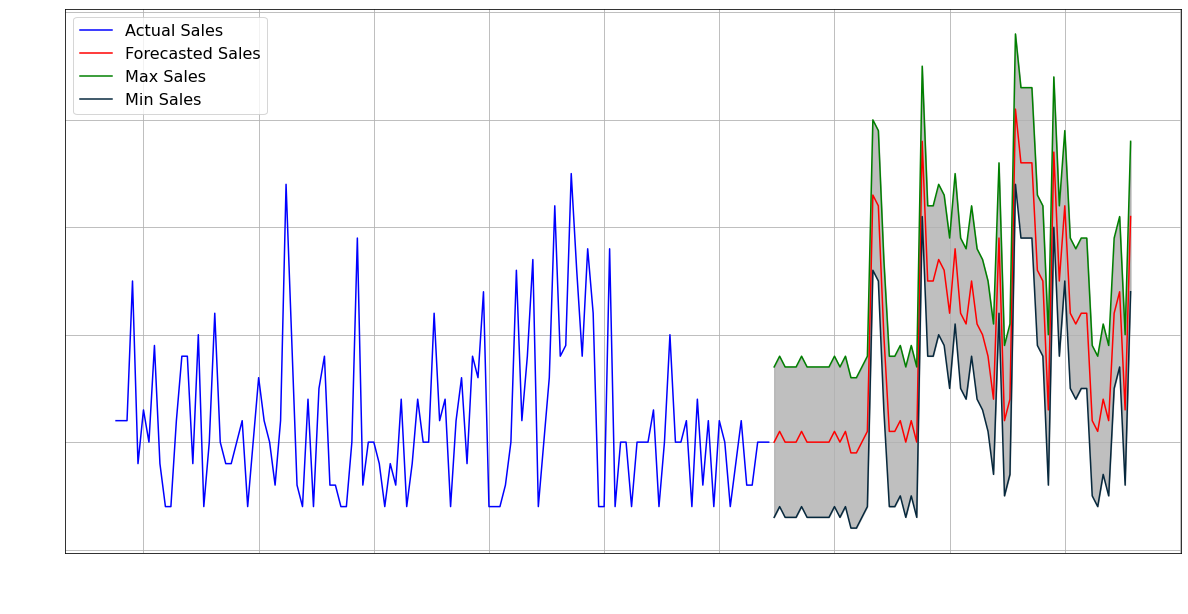

In [62]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
# import seaborn as sns
# sns.set()

X = sugardaddy[:186]

y = expresso['Actual sales'][:120]
y1 = expresso['Forecasted sales']
y2 = expresso['max_sales']
y3 = expresso['min_sales']

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(X[:120],y,color='b', label='Actual Sales')
ax.plot(X[120:],y1[120:],color='r', label='Forecasted Sales')
ax.plot(X[120:],y2[120:],color='g', label='Max Sales')
ax.plot(X[120:],y3[120:],color='#06283D', label='Min Sales')
plt.fill_between(X[120:],y2[120:], y3[120:], color='grey', alpha=0.5)
# ax.plot(x2,y2,color='g', label='Model')
ax.set_xlabel('Period', fontsize=28)
ax.set_ylabel('Sales', fontsize=28)

# x_trend=['01-02-2021', '24-05-2022']
# y_trend=[7, 7]   
# ax.plot(x_trend, y_trend, color='#06283D', label="Trend")
ax.legend(loc='upper left', fontsize=16)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
# date_form = DateFormatter("%d/%m/%Y")
# ax.xaxis.set_major_formatter(date_form)   
ax.tick_params(axis='both', which='major', labelsize=15, colors='white')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
plt.grid()
plt.savefig('/home/dwip.dalal/Time_series_Analysis/foo.png')

In [63]:
# finding accuracy 
p = 0
pa = 0
for a,b,c in zip(expresso['Actual sales'], expresso['max_sales'], expresso['min_sales']):
    if a >= c and a <= b:
        p += 1
    else:
        pa += 1

accuracy = p/(p+pa)

accuracy

        

0.7473118279569892

In [64]:
expresso.to_csv('Hazelnut flavor syrup Sales.csv')